<a href="https://colab.research.google.com/github/RASIUT/Stock_Prediction/blob/main/Stock_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Importing Libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf

##Setting up the dataset

Get the start and end date for the model to train

In [12]:
start = '2015-01-01'
end = '2025-01-01'
stock = 'GOOG'

data = yf.download(stock, start, end)

[*********************100%***********************]  1 of 1 completed


In [13]:
type(data)

pandas.core.frame.DataFrame

Set the index

In [14]:
data.reset_index(inplace=True)

In [15]:
data.head()

Price,Date,Close,High,Low,Open,Volume
Ticker,,GOOG,GOOG,GOOG,GOOG,GOOG
0,2015-01-02,26.045292,26.365890,26.010056,26.253730,28951268
1,2015-01-05,25.502361,26.021471,25.462164,25.968368,41196796
2,2015-01-06,24.911289,25.616753,24.866129,25.558439,57998800
3,2015-01-07,24.868612,25.173526,24.796651,25.161417,41301082
4,2015-01-08,24.947021,24.986724,24.367366,24.714266,67071641


##Trying to predict the price with the help of moving_average
moving_average is like using the the mean(last 10 days) to predict the price of 11th day

In [18]:
moving_average_100_days = data.Close.rolling(100).mean()

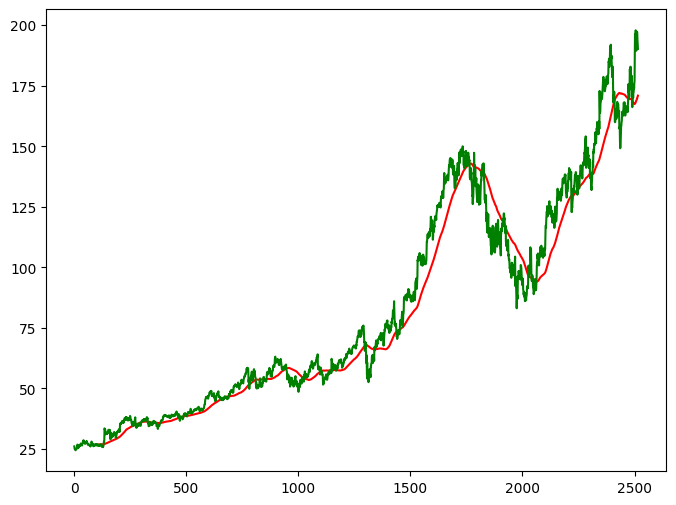

In [19]:
plt.figure(figsize=(8,6))
plt.plot(moving_average_100_days, 'r')
plt.plot(data.Close, 'g')
plt.show()

In [20]:
moving_average_200_days = data.Close.rolling(200).mean()

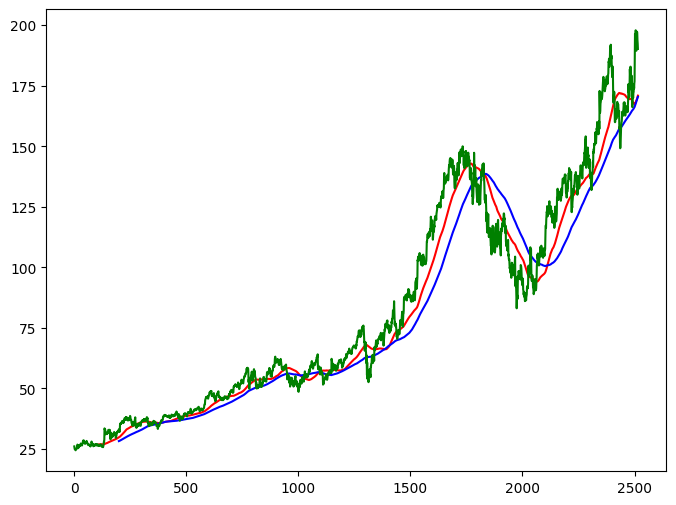

In [21]:
plt.figure(figsize=(8,6))
plt.plot(moving_average_100_days, 'r')
plt.plot(moving_average_200_days,'b')
plt.plot(data.Close,'g')
plt.show()

Check for null values

In [24]:
pd.isnull(data).sum()

,,0
Price,Ticker,
Date,,0
Close,GOOG,0
High,GOOG,0
Low,GOOG,0
Open,GOOG,0
Volume,GOOG,0


In [25]:
data_train = pd.DataFrame(data.Close[0: int(len(data)*0.80)])
data_test = pd.DataFrame(data.Close[int(len(data)*0.80): len(data)])

In [26]:
data_train.shape[0]

2012

In [27]:
data_test.shape[0]

504

##Scale the data to 0s and 1s

In [28]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))

In [29]:
data_train_scale = scaler.fit_transform(data_train)

##Using first 100 days to calculate the stock price of 101th day


In [30]:
x = []
y = []

for i in range(100, data_train_scale.shape[0]):
    x.append(data_train_scale[i-100:i])
    y.append(data_train_scale[i,0])


In [31]:
x, y = np.array(x), np.array(y)

In [32]:
from keras.layers import Dense, Dropout, LSTM
from keras.models import Sequential

In [33]:
model = Sequential()
model.add(LSTM(units = 50, activation = 'relu', return_sequences = True, input_shape = ((x.shape[1],1))))
model.add(Dropout(0.2))

model.add(LSTM(units = 60, activation='relu', return_sequences = True))
model.add(Dropout(0.3))

model.add(LSTM(units = 80, activation = 'relu', return_sequences = True))
model.add(Dropout(0.4))

model.add(LSTM(units = 120, activation = 'relu'))
model.add(Dropout(0.5))

model.add(Dense(units =1))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [34]:
model.compile(optimizer = 'adam', loss = 'mean_squared_error')

In [35]:
model.fit(x,y, epochs = 50, batch_size =32, verbose =1)

Epoch 1/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 28s 327ms/step - loss: 0.0643
Epoch 2/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 19s 321ms/step - loss: 0.0097
Epoch 3/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 17s 279ms/step - loss: 0.0066
Epoch 4/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 21s 286ms/step - loss: 0.0064
Epoch 5/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 17s 279ms/step - loss: 0.0049
Epoch 6/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 25s 353ms/step - loss: 0.0064
Epoch 7/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 37s 282ms/step - loss: 0.0056
Epoch 8/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 18s 300ms/step - loss: 0.0049
Epoch 9/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 19s 280ms/step - loss: 0.0044
Epoch 10/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 22s 306ms/step - loss: 0.0050
Epoch 11/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 17s 281ms/step - loss: 0.0040
Epoch 12/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 17s 284ms/step - loss: 0.0043
Epoch 13/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 20s 283ms/step - loss: 0.0033
Epoch 14/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 22s 303ms/step - loss: 0.0045
Epoch 15/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 17s 

In [36]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                          │ (None, 100, 50)             │          10,400 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 100, 50)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_1 (LSTM)                        │ (None, 100, 60)             │          26,640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 100, 60)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_2 (LSTM)                        │ (None, 100, 80)             │          45,120 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 100, 80)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_3 (LSTM)                        │ (None, 120)                 │          96,480 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 120)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 1)                   │             121 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 536,285 (2.05 MB)

 Trainable params: 178,761 (698.29 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 357,524 (1.36 MB)

In [37]:
pas_100_days = data_train.tail(100)

In [38]:
data_test = pd.concat([pas_100_days, data_test], ignore_index=True)

In [39]:
data_test_scale  =  scaler.fit_transform(data_test)

In [40]:
x = []
y = []

for i in range(100, data_test_scale.shape[0]):
    x.append(data_test_scale[i-100:i])
    y.append(data_test_scale[i,0])
x, y = np.array(x), np.array(y)

In [41]:
y_predict = model.predict(x)

16/16 ━━━━━━━━━━━━━━━━━━━━ 2s 118ms/step


In [42]:
scale =1/scaler.scale_

In [43]:
y_predict = y_predict*scale

In [44]:
y = y*scale

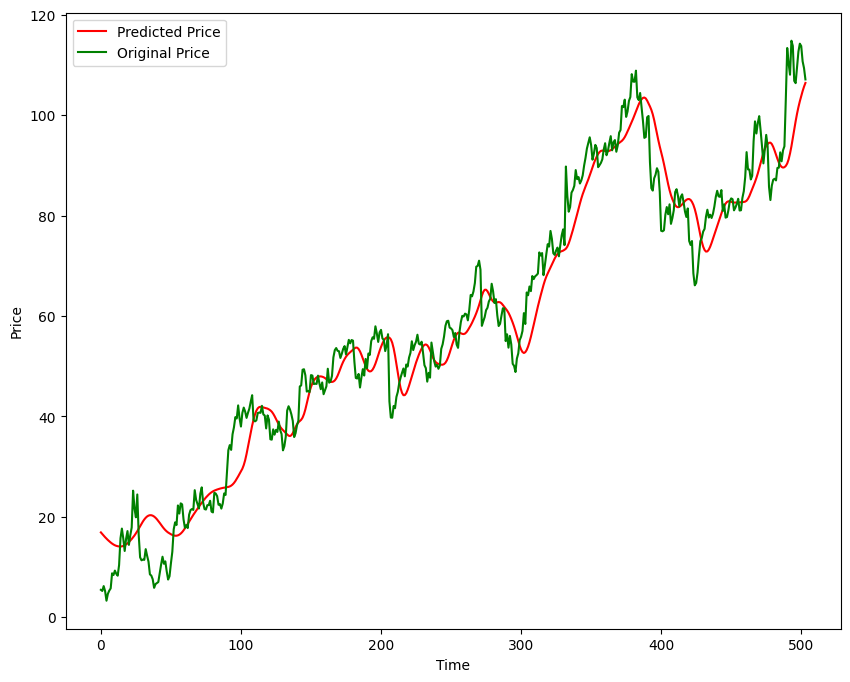

In [45]:
plt.figure(figsize=(10,8))
plt.plot(y_predict, 'r', label = 'Predicted Price')
plt.plot(y, 'g', label = 'Original Price')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()

In [46]:
model.save('Stock Predictions Model.keras')